In [71]:
from google.colab import drive
drive.mount('/content/ggdrive')

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [72]:
cd '/content/ggdrive/MyDrive/Stree_Recognition_2/images'

/content/ggdrive/MyDrive/Stree_Recognition_2/images


In [73]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions
from keras.applications import ResNet101
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

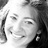

In [74]:
import pathlib
import PIL.Image
import glob
data_dir = pathlib.Path('/content/ggdrive/MyDrive/Stree_Recognition_2/images/train/')
gun = list(data_dir.glob('happy/*'))
PIL.Image.open(str(gun[1]))

In [75]:
data_dir = '/content/ggdrive/MyDrive/Stree_Recognition_2/images/train'
batch_size = 2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset = "training",
    seed = 123,
    label_mode= 'categorical',
    batch_size = batch_size

)

Found 2400 files belonging to 3 classes.
Using 1920 files for training.


In [76]:
data_dir1 = '/content/ggdrive/MyDrive/Stree_Recognition_2/images/validation'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir1,
    validation_split =0.2,
    subset = "validation",
    seed = 123,
    label_mode= 'categorical',
    batch_size = batch_size
)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [77]:
class_names = train_ds.class_names[0:]
print(class_names)

['happy', 'neutral', 'stressed']


In [78]:
class_names = val_ds.class_names[0:]
print(class_names)

['happy', 'neutral', 'stressed']


In [79]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import efficientnet.keras as efn

In [89]:

baseModel = tf.keras.applications.VGG16(
                                              include_top=False,
                                              weights="imagenet",
                                            
                                          )

In [82]:
# baseModel = efn.EfficientNetB0(include_top=False,
#                                weights="imagenet")

16804768/16804768 [==============================] - 2s 0us/step


In [90]:
#Freezing Layer
for layer in baseModel.layers:
  layer.trainable = False


In [91]:
#Constructing Model
model = Sequential()
model.add(baseModel)
model.add(Conv2D(255,kernel_size=(2,2), strides=(1,1), activation='relu', padding='valid'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.25))
# model.add(Conv2D(12,kernel_size=(2,2), strides=(1,1) , activation='relu', padding = 'valid'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout())
model.add(Flatten())
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(116, activation="sigmoid"))
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(116, activation="sigmoid"))
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [92]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

In [93]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 conv2d_108 (Conv2D)         (None, None, None, 255)   522495    
                                                                 
 global_average_pooling2d_10  (None, 255)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_18 (Dropout)        (None, 255)               0         
                                                                 
 flatten_11 (Flatten)        (None, 255)               0         
                                                                 
 module_wrapper_44 (ModuleWr  (None, 250)              64000     
 apper)                                              

In [94]:
#fitting Model
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 80
)

Epoch 1/80
960/960 [==============================] - 22s 22ms/step - loss: 1.0684 - accuracy: 0.4031 - val_loss: 1.0455 - val_accuracy: 0.5167
Epoch 2/80
960/960 [==============================] - 21s 22ms/step - loss: 0.9429 - accuracy: 0.5083 - val_loss: 0.9853 - val_accuracy: 0.5500
Epoch 3/80
960/960 [==============================] - 21s 22ms/step - loss: 0.9353 - accuracy: 0.5120 - val_loss: 0.9634 - val_accuracy: 0.5333
Epoch 4/80
960/960 [==============================] - 21s 22ms/step - loss: 0.9119 - accuracy: 0.5141 - val_loss: 0.9309 - val_accuracy: 0.5167
Epoch 5/80
960/960 [==============================] - 21s 22ms/step - loss: 0.8782 - accuracy: 0.5422 - val_loss: 0.9675 - val_accuracy: 0.5333
Epoch 6/80
960/960 [==============================] - 21s 22ms/step - loss: 0.8869 - accuracy: 0.5469 - val_loss: 0.9281 - val_accuracy: 0.5417
Epoch 7/80
960/960 [==============================] - 22s 22ms/step - loss: 0.8715 - accuracy: 0.5562 - val_loss: 0.9174 - val_accuracy:

In [95]:
model.evaluate(val_ds)

60/60 [==============================] - 1s 21ms/step - loss: 0.8529 - accuracy: 0.6250


[0.85288405418396, 0.625]